data: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) <br>


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from lifelines import KaplanMeierFitter

In [2]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
data_path = '/hdd/data/adp_data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(data_path, index_col = 'customerID')
print(df.shape)
df.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
print(df['TotalCharges'].isna().sum())

11


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
print(len(df.loc[(df['tenure'] == 0) & (df['TotalCharges'].isna())]))

11


In [8]:
df.loc[(df['tenure'] == 0) & (df['TotalCharges'].isna()), 'TotalCharges'] = 0

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [10]:
df.describe(include = 'object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


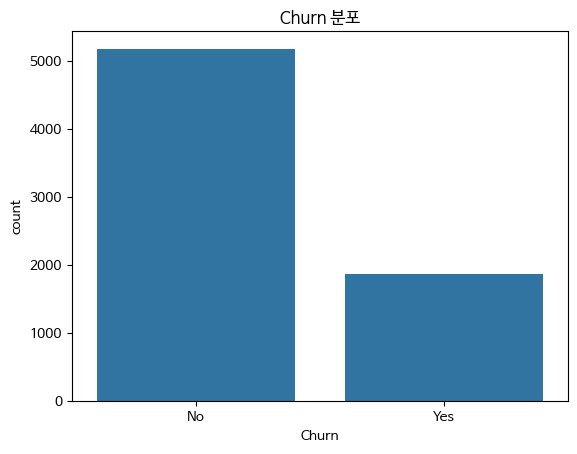

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [11]:
sns.countplot(x = 'Churn', data = df)
plt.title('Churn 분포')
plt.show()

print(df['Churn'].value_counts(normalize = True))

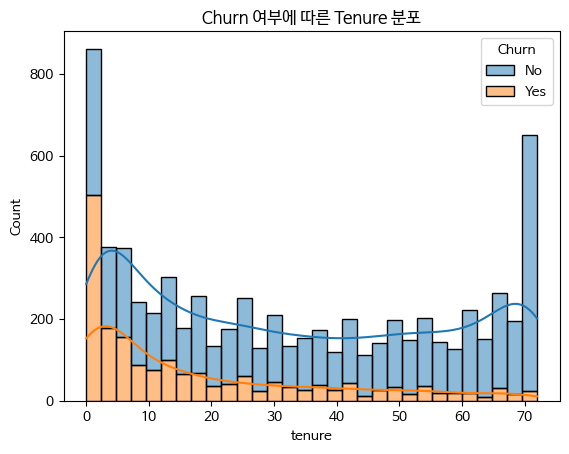

In [12]:
sns.histplot(data = df, x = 'tenure', bins = 30, hue = 'Churn', kde = True, multiple = 'stack')
plt.title('Churn 여부에 따른 Tenure 분포')
plt.show()

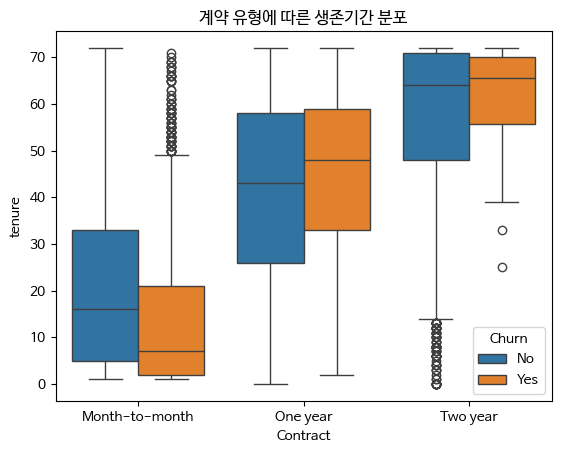

In [13]:
sns.boxplot(x = 'Contract', y = 'tenure', hue = 'Churn', data = df)
plt.title('계약 유형에 따른 생존기간 분포')
plt.show()

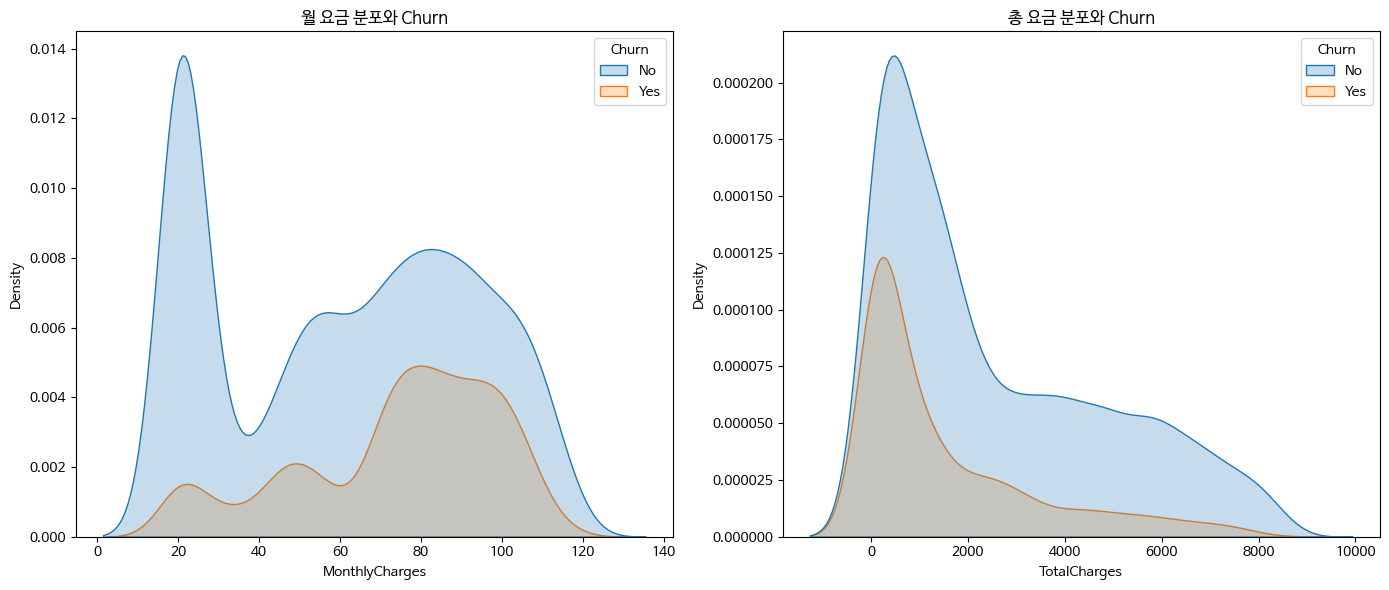

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.kdeplot(data = df, x = 'MonthlyCharges', hue = 'Churn', fill = True, ax = axes[0])
axes[0].set_title('월 요금 분포와 Churn')

sns.kdeplot(data = df, x = 'TotalCharges', hue = 'Churn', fill = True, ax = axes[1])
axes[1].set_title('총 요금 분포와 Churn')

plt.tight_layout()
plt.show()

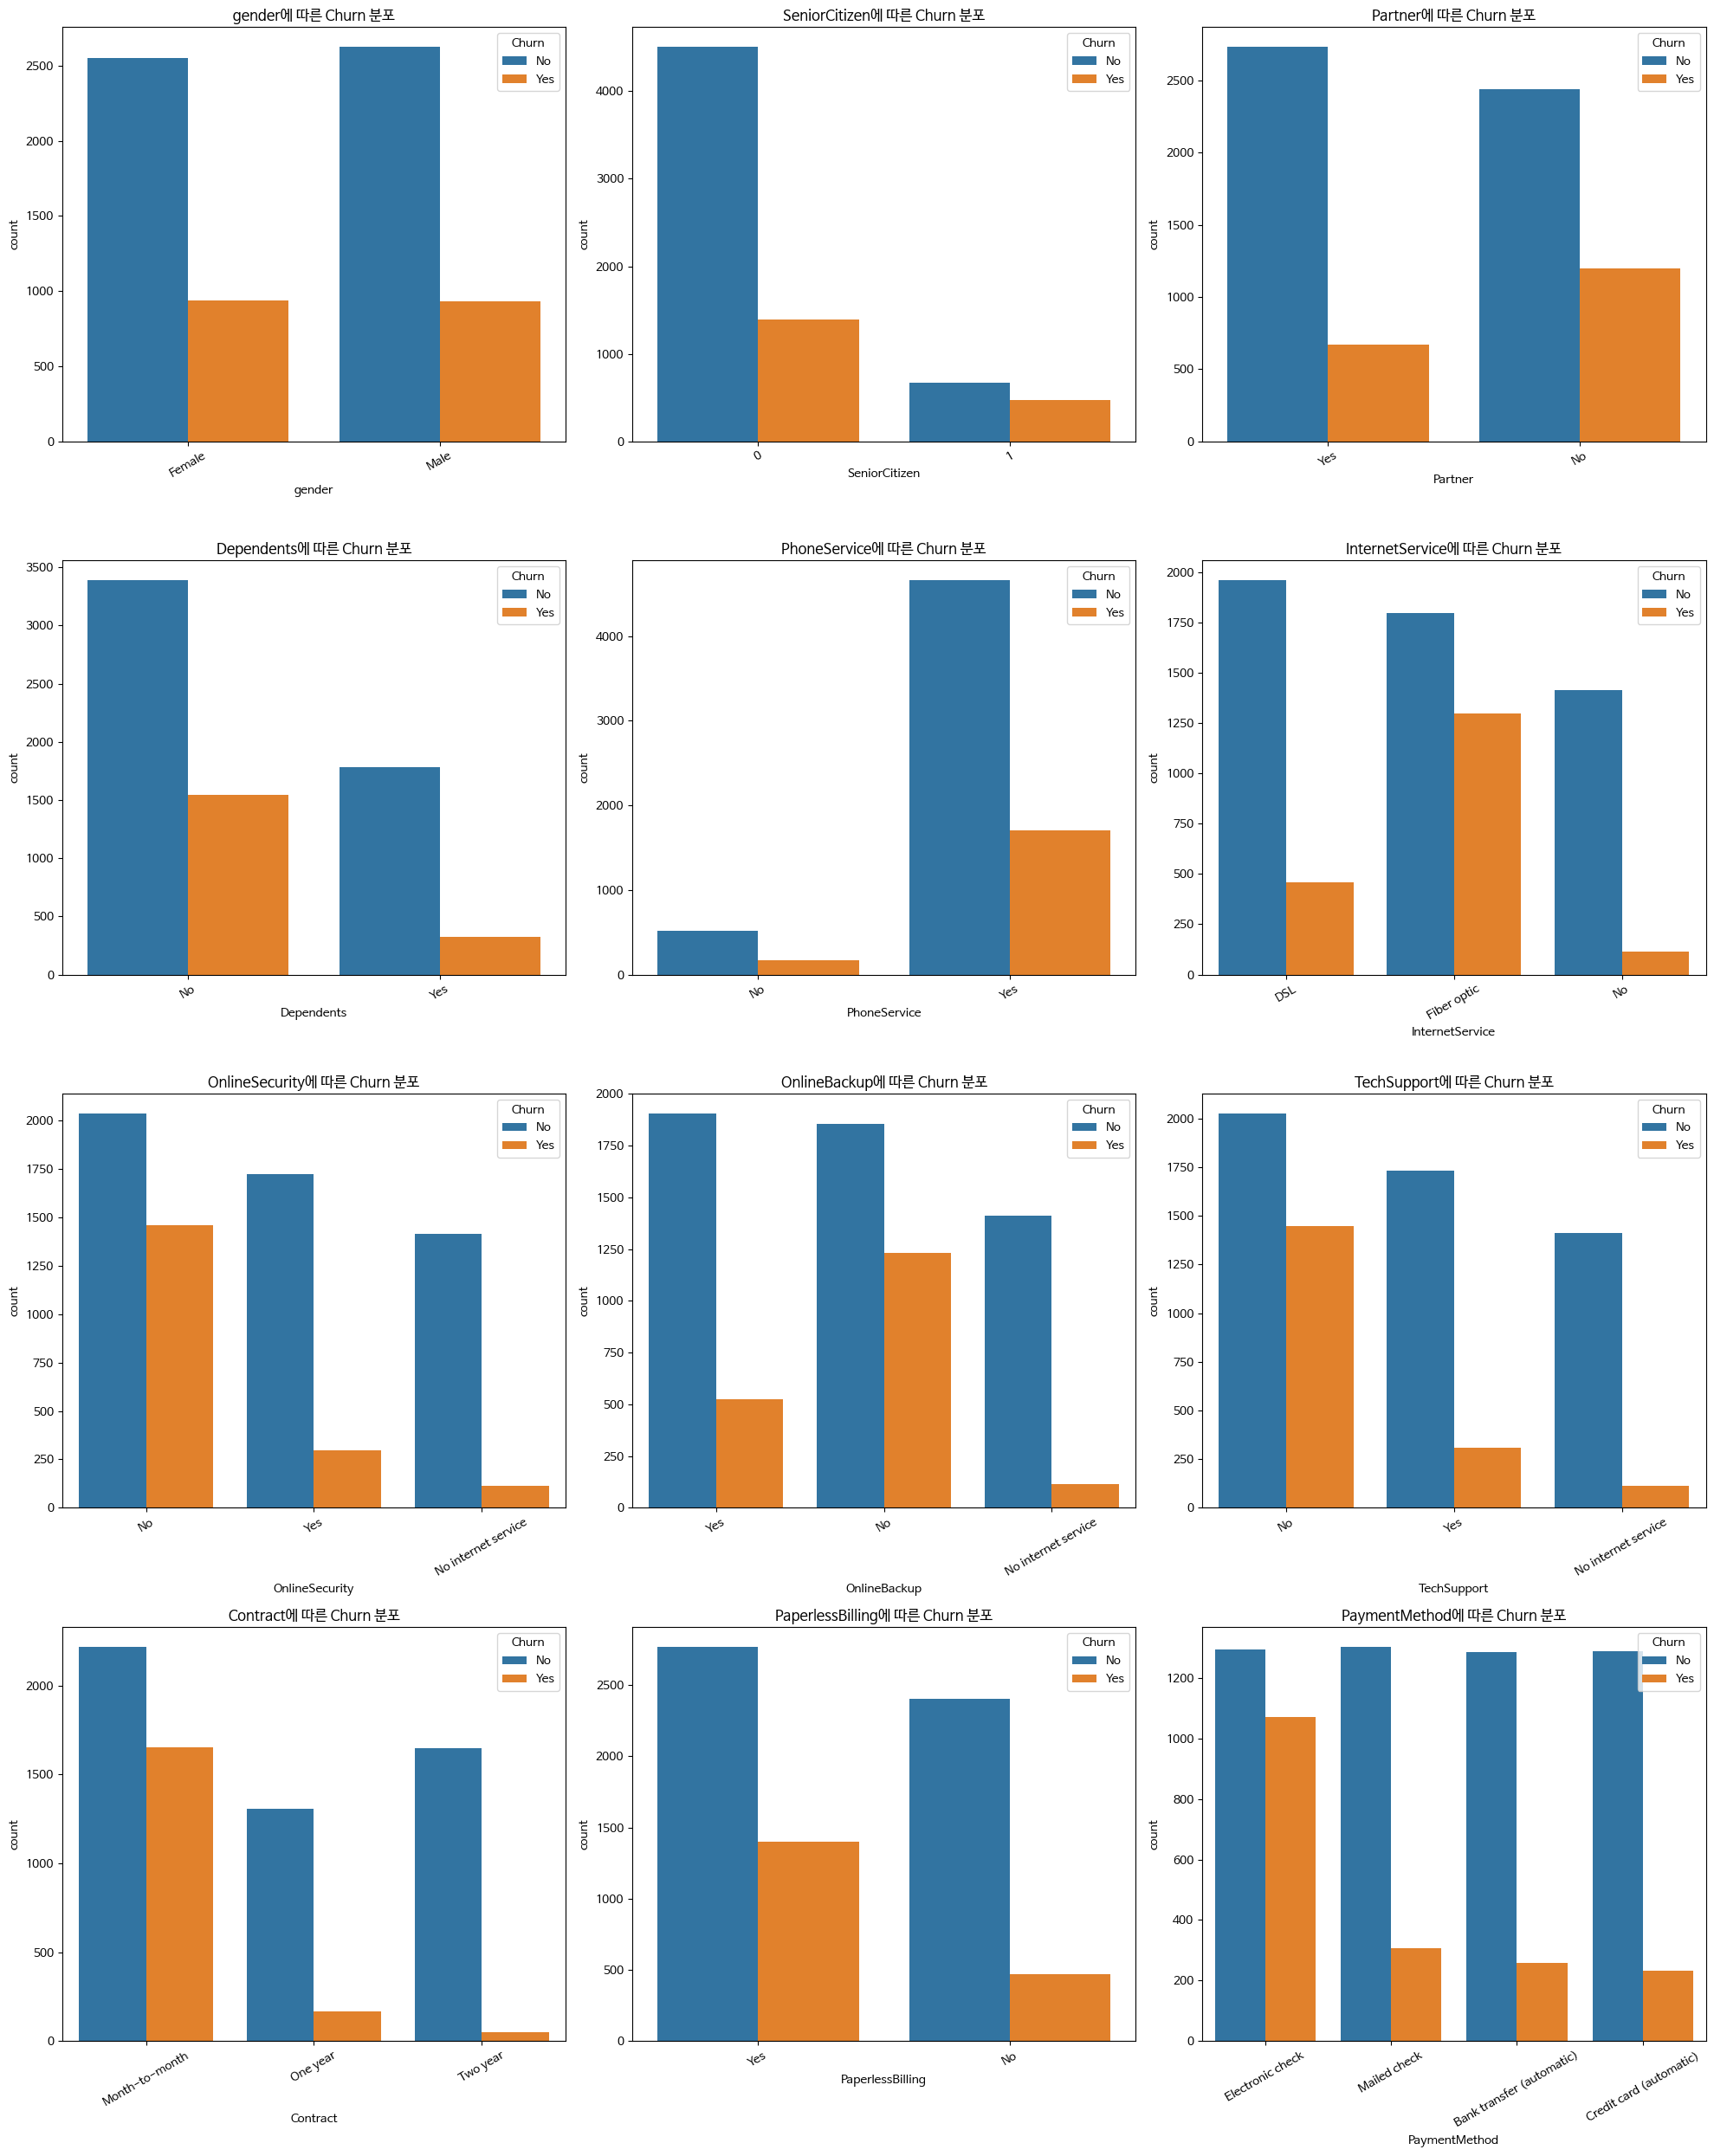

In [15]:
categorical_features = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
    "InternetService", "OnlineSecurity", "OnlineBackup", "TechSupport", 
    "Contract", "PaperlessBilling", "PaymentMethod"
]

fig, axes = plt.subplots(4, 3, figsize = (20, 25))

for i, col in enumerate(categorical_features):
    row = i // 3
    col_idx = i % 3
    sns.countplot(x = col, hue = 'Churn', data = df, ax = axes[row][col_idx])
    axes[row][col_idx].set_title(f'{col}에 따른 Churn 분포')
    axes[row][col_idx].tick_params(axis = 'x', rotation = 30)

plt.tight_layout()
plt.show()

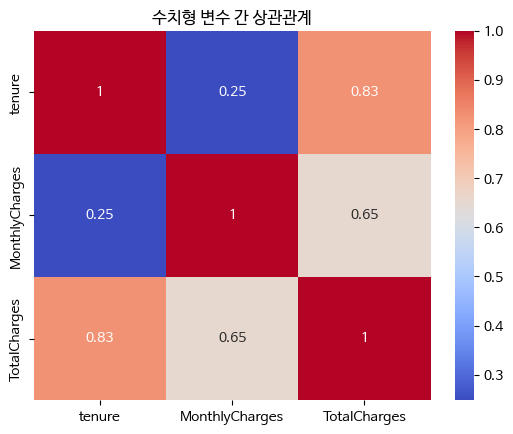

In [17]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('수치형 변수 간 상관관계')
plt.show()

기간(duration): `tenure`(고객이 서비스를 유지한 개월 수)<br>
이벤트 여부(event): `Churn`

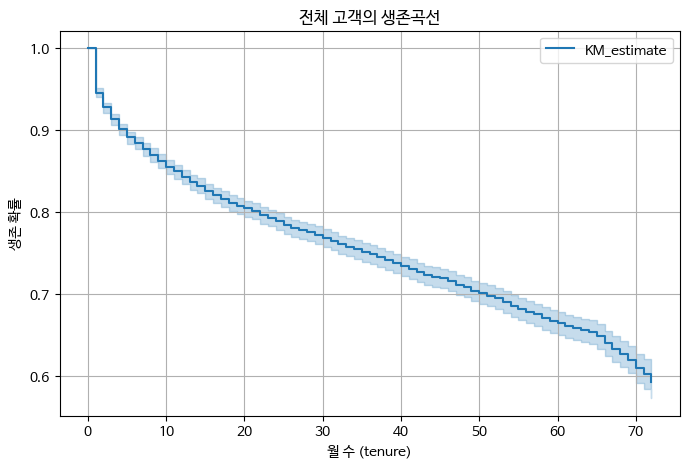

In [19]:
df['Churn_binary'] = df['Churn'].map({'No': 0, 'Yes': 1})

T = df['tenure']
E = df['Churn_binary']

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed = E)

plt.figure(figsize = (8, 5))
kmf.plot()
plt.title('전체 고객의 생존곡선')
plt.xlabel('월 수 (tenure)')
plt.ylabel('생존 확률')
plt.grid(True)
plt.show()